In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from data_processing import *
from utils import feature_desc

from sklearn.preprocessing import StandardScaler

#### Load data

In [3]:
df_og = load(csv_path = '../data/data.csv')

#### Aggregate time into clusters of size k

In [4]:
k = 15
df_og = aggregate(df_og, k)

/home/kacper/studia/cuvalley/data_processing/data_processing.py:127: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if not type(agg_df['czas']) is pd.datetime:


### Proste featury wybieram albo tworze agregując


In [5]:
df = pd.DataFrame(index=df_og.index)

In [6]:
# srednia po 'WODY POWROTNE KOLEKTORÓW [°C]'
TIR = df_og.columns[df_og.columns.str.contains('tir')].values
df['TIR'] = df_og[TIR].mean(axis='columns')

In [7]:
# srednia po 'TEMP POD 2 WARSTWĄ WYMURÓWKI [°C]'
TIX1 = df_og.columns[df_og.columns.str.contains('001tix')].values
df['TIX1'] = df_og[TIX1].mean(axis='columns')

In [8]:
# prob_s i prob_corg
PR = ['prob_s', 'prob_corg']
df[PR] = df_og[PR]

In [9]:
# reg nadawy koncentratu
FCX = df_og.columns[df_og.columns.str.contains('fcx')].values
df['FCX'] = df_og[FCX].mean(axis='columns')

In [10]:
# sumaryczna moc cieplna
NIR = df_og.columns[df_og.columns.str.contains('nir')].values
df['NIR'] = df_og[NIR]

In [11]:
# WENT ODCZ ZAD OBROTÓW
UXM = df_og.columns[df_og.columns.str.contains('uxm')].values
df['UXM'] = df_og[UXM].mean(axis='columns')

In [12]:
# dodanie temperatury żużla
df["temp_zuz"] = df_og["temp_zuz"]

## Generalnie to wypierdalam outlierów

In [13]:
df = df.loc[(df_og.temp_zuz < 1319) & (df_og.temp_zuz > 1280)]

<AxesSubplot:xlabel='czas', ylabel='temp_zuz'>

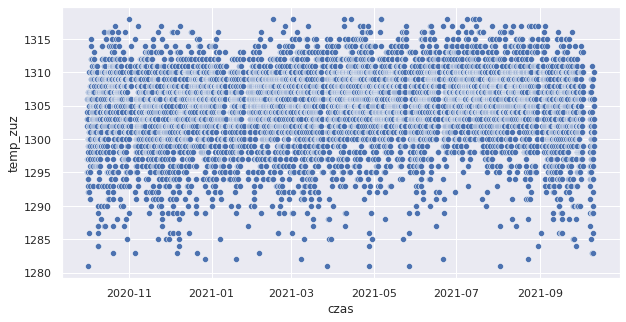

In [14]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.scatterplot(data=df, x='czas', y="temp_zuz")

## Split into train, val and test sets

In [15]:
df1, df2, df3 = split(df, proportions=(0.7, 0.15, 0.15))

## Eventually you scale the data as follows

In [16]:
df1.head(3)

,TIR,TIX1,prob_s,prob_corg,FCX,NIR,UXM,temp_zuz
czas,,,,,,,,
2020-09-30 22:00:00+00:00,29.086390,418.990965,9.87,8.6,36.478403,14.362428,92.173271,1297.0
2020-09-30 23:00:00+00:00,28.976641,418.922325,9.87,8.6,36.089802,14.928113,92.183384,1295.0
2020-10-01 00:00:00+00:00,28.977891,418.830454,9.87,8.6,35.183596,15.156648,92.185646,1303.0


In [17]:
df1, df2, df3 = scale(df1, df2, df3)

/home/kacper/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
df1.head(3)

,TIR,TIX1,prob_s,prob_corg,FCX,NIR,UXM,temp_zuz
czas,,,,,,,,
2020-09-30 22:00:00+00:00,0.488861,0.506703,-1.433003,-0.545116,-0.144934,-1.763509,-0.191252,1297.0
2020-09-30 23:00:00+00:00,0.294764,0.493559,-1.433003,-0.545116,-0.245414,-1.583898,-0.189559,1295.0
2020-10-01 00:00:00+00:00,0.296975,0.475966,-1.433003,-0.545116,-0.479731,-1.511335,-0.189181,1303.0


## Data is now ready to do somthing with it

In [19]:
df1.to_csv('../data/train.csv')
df2.to_csv('../data/test.csv')
df3.to_csv('../data/val.csv')